In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('_DATA/stock/AAPL_2019.12.17-2021.12.17.csv')
# add column for close price on previous day
dataset['Volume-Previous-Day'] = dataset['Volume'].shift(1)
dataset = dataset.dropna()
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Volume-Previous-Day
1,2019-12-18,69.949997,70.474998,69.779999,69.934998,68.911400,116028400,114158400.0
2,2019-12-19,69.875000,70.294998,69.737503,70.004997,68.980354,98369200,116028400.0
3,2019-12-20,70.557503,70.662498,69.639999,69.860001,68.837479,275978000,98369200.0
4,2019-12-23,70.132500,71.062500,70.092499,71.000000,69.960808,98572000,275978000.0
5,2019-12-24,71.172501,71.222504,70.730003,71.067497,70.027313,48478800,98572000.0


In [2]:
# data preprocessing
X = dataset[['Open', 'Volume-Previous-Day']].values
y = dataset['Close'].values

In [3]:
# split data to train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0, shuffle = False)

print("Train size =", len(y_train))
print("Test size =", len(y_test))

Train size = 337
Test size = 167


In [4]:
import time
start_time_ms = time.time() * 1000

# Fitting the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# predicting the test set results
y_pred = regressor.predict(X_test)

end_time_ms = time.time() * 1000
print("Prediction completed. Time spent = %.3f seconds" % ((end_time_ms - start_time_ms) / 1000))

Prediction completed. Time spent = 0.057 seconds


In [5]:
# diplay stats 
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
#print("y_test", y_test)
#print("y_pred", y_pred)
print('Coefficients: \n', regressor.coef_)
print('Intercepts:', regressor.intercept_)    # the intercept (often labeled the constant) 
                                                 # is the expected mean value of Y when all X=0
print('Score of the model: %.2f' % regressor.score(X_test, y_test))
print('R^2 score: %.2f' % r2_score(y_test, y_pred))
print("RMSE (root mean square error): %.2f" % sqrt(mean_squared_error(y_test, y_pred)))

Coefficients: 
 [9.89736639e-01 4.63700883e-10]
Intercepts: 1.0216917276775348
Score of the model: 0.98
R^2 score: 0.98
RMSE (root mean square error): 1.95


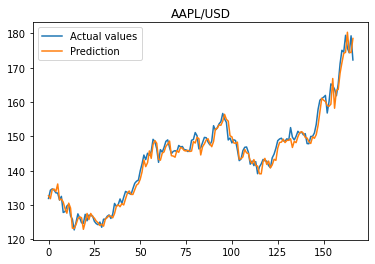

In [6]:
import matplotlib.pyplot as plt
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['Actual values', 'Prediction'])
plt.title("AAPL/USD")
plt.show()